In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


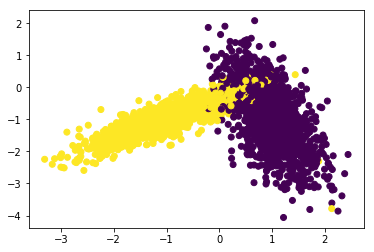

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [3]:
#basically this function will divide training data based on folds and use some part as cv and some part as cv to calculate 
#the best hyperparameter k value 
def RandomSearchCV(X_train, y_train, classifier, params, folds):
    #this will divide tha data based on folds we need if fold is 3, it will be divided in 3 parts
    
    x_folds = np.array_split(X_train, folds)
    y_folds = np.array_split(y_train, folds)
    
    cvscores = []
    trainscores = []
    
    #selecting a k from random cv list (params)
    for i in tqdm(params):
        
        #selecting a kfold for each random k
        for k in range(0, folds):
            cv_kfold_acc = []
            train_kfold_acc = []
            
            classifier.n_neighbors = i
            x_cv, y_cv = x_folds[k], y_folds[k]
            
            #this will take training data which is not in cv
            x_train_cv = np.concatenate([x for j, x in enumerate(x_folds) if j!=k])
            y_train_cv = np.concatenate([y for j, y in enumerate(y_folds) if j!=k])
            
            
            classifier.fit(x_train_cv, y_train_cv)
            y_predicted = classifier.predict(x_cv)
            cv_kfold_acc.append(accuracy_score(y_cv, y_predicted))
            
            y_predicted = classifier.predict(x_train_cv)
            train_kfold_acc.append(accuracy_score(y_train_cv, y_predicted))
        
        cvscores.append(np.mean(np.array(cv_kfold_acc)))
        trainscores.append(np.mean(np.array(train_kfold_acc)))
        
    return cvscores, trainscores

[4, 15, 22, 30, 31, 33, 34, 35, 36, 44]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.02it/s]


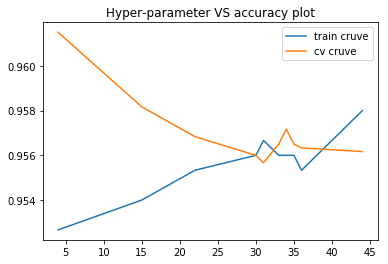

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params = []

params = range(1, 50)
params = random.sample(params, 10)
params.sort()
print(params)

#K'
#we can change fold here
folds = 5

trainscores,cvscores = RandomSearchCV(X_train, y_train, neigh, params, folds)
 

plt.plot(params,trainscores, label='train cruve')
plt.plot(params, cvscores, label='cv cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [5]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

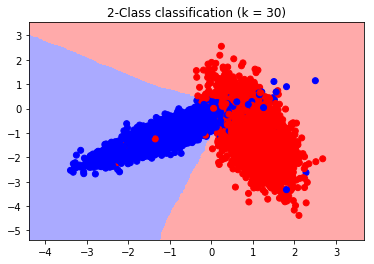

In [6]:
from matplotlib.colors import ListedColormap
#according to plot k should be around 30
neigh = KNeighborsClassifier(n_neighbors = 30)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)